0.0
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 average_pooling2d_3 (Averag  (None, 16, 16, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 average_pooling2d_4 (Averag  (None, 7, 7, 64)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 64)          36928     
                                                                 
 average_pooling2d_5 (Averag  (None, 2, 2, 64)    

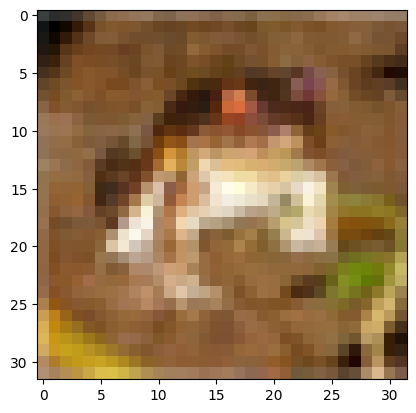

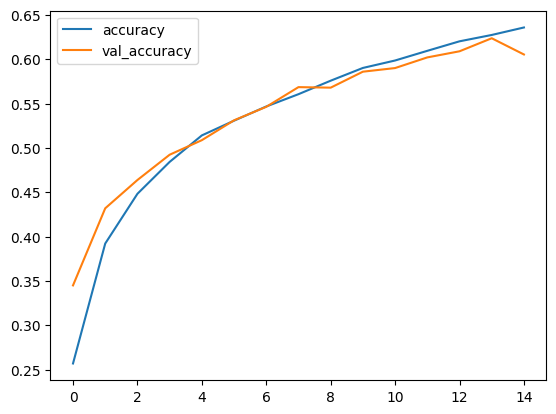

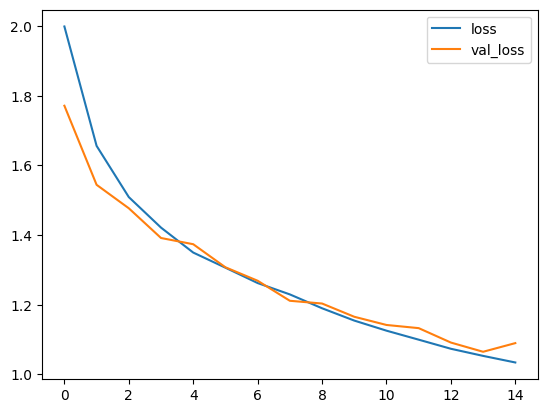

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import AvgPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
plt.imshow(x_train[0],cmap='gray')
x_train_scaled=x_train/255
x_test_scaled=x_test/255
print(x_train_scaled.min())
x_train_scaled.max()
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)
model=Sequential([layers.Input(shape=(32,32,3)),
                  Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
                  AvgPool2D(),
                  Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                  AvgPool2D(),
                  Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                  AvgPool2D(),
                  layers.Flatten(),
                  Dense(32,activation='relu'),
                  Dense(16,activation='relu'),
                  Dense(10,activation='softmax')
                  ])
model.summary()
model.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

model.fit(x_train_scaled ,y_train_onehot, epochs=15,
          batch_size=256, 
          validation_data=(x_test_scaled,y_test_onehot))
metrics = pd.DataFrame(model.history.history)
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()

x_test_predictions = np.argmax(model.predict(x_test_scaled), axis=1)

print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))
